In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv(r"C:\Users\Arin\OneDrive\Desktop\Projects\Credit Card Default Prediction\UCI_Credit_Card.csv")

# Clean up column names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace(".", "_")

In [3]:
# Display data shape
print("\nDataset Overview:")
print(f"Shape: {df.shape}")


Dataset Overview:
Shape: (30000, 25)


In [4]:
# Display first few rows
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
# Display basic statistics
df.describe().round(2)

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


In [6]:
# Check for missing values
print(df.isnull().sum().any())

False


In [7]:
# Display data types
df.dtypes

id                              int64
limit_bal                     float64
sex                             int64
education                       int64
marriage                        int64
age                             int64
pay_0                           int64
pay_2                           int64
pay_3                           int64
pay_4                           int64
pay_5                           int64
pay_6                           int64
bill_amt1                     float64
bill_amt2                     float64
bill_amt3                     float64
bill_amt4                     float64
bill_amt5                     float64
bill_amt6                     float64
pay_amt1                      float64
pay_amt2                      float64
pay_amt3                      float64
pay_amt4                      float64
pay_amt5                      float64
pay_amt6                      float64
default_payment_next_month      int64
dtype: object

In [8]:
# Process categorical variables 
education_map = {
    0: 0,  # Unknown
    1: 1,  # Graduate School
    2: 2,  # University
    3: 3,  # High School
    4: 4,  # Others
    5: 0,  # Unknown
    6: 0,  # Unknown
}
df["education_cat"] = df["education"].map(education_map).astype("category")

df["marriage_cat"] = df["marriage"].astype("category")# 0: Unknown, 1: Married, 2: Single, 3: Other

df["sex_cat"] = df["sex"].astype("category")  # 1: Male, 2: Female

# Drop original categorical variables
df = df.drop(columns=["education", "marriage", "sex"])

# Convert PAY_# status columns to category (keeping numeric values)
for n in np.arange(0, 7):
    if n != 1:
        df[f"pay_{n}"] = df[f"pay_{n}"].astype("category")

In [9]:
#  Derived Features

# Payment delay trend (linear slope)
pay_cols = [f"pay_{n}" for n in np.arange(0, 7) if n != 1]
df["payment_delay_trend"] = df[pay_cols].apply(
    lambda x: np.polyfit(range(len(x)), x.astype(float), 1)[0], axis=1
)

# Maximum payment delay
df["max_payment_delay"] = df[pay_cols].astype(float).max(axis=1)

# Credit utilization ratios
for n in np.arange(1, 7):
    df[f"utilization_ratio_{n}"] = df[f"bill_amt{n}"] / df["limit_bal"].replace(0, np.nan)

In [10]:
# Check for missing values
print("\nCheck for missing values:")
print(df.isnull().sum().any())

# Check final data shape
print("\nData shape:")
print(df.shape)


Check for missing values:
False

Data shape:
(30000, 33)


In [11]:
df.columns

Index(['id', 'limit_bal', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'default_payment_next_month',
       'education_cat', 'marriage_cat', 'sex_cat', 'payment_delay_trend',
       'max_payment_delay', 'utilization_ratio_1', 'utilization_ratio_2',
       'utilization_ratio_3', 'utilization_ratio_4', 'utilization_ratio_5',
       'utilization_ratio_6'],
      dtype='object')

In [12]:
# Define feature types
cat_cols = df.select_dtypes(include=["category"]).columns.tolist()
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("\nCheck all columns are captured:")
df.shape[1] == len(cat_cols) + len(num_cols)


Check all columns are captured:


True

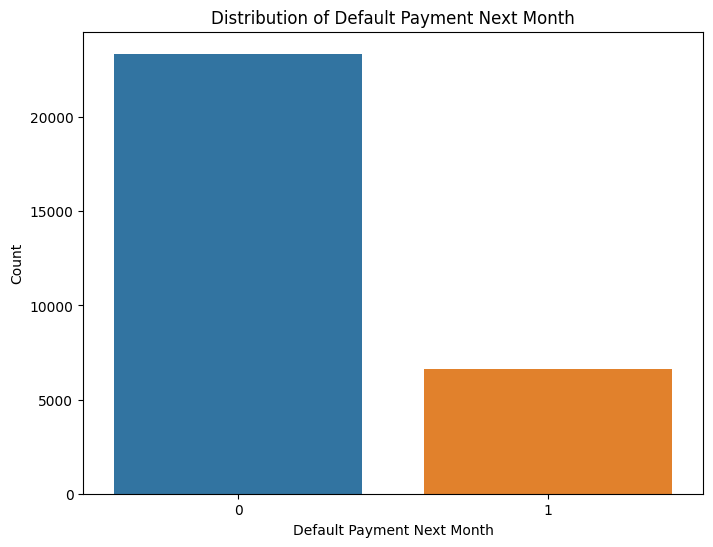


Overall default rate: 22.12%


In [13]:
# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="default_payment_next_month", data=df)
plt.title("Distribution of Default Payment Next Month")
plt.xlabel("Default Payment Next Month")
plt.ylabel("Count")
plt.show()

default_rate = df["default_payment_next_month"].value_counts(normalize=True)[1].round(4)
print(f"\nOverall default rate: {default_rate*100}%")

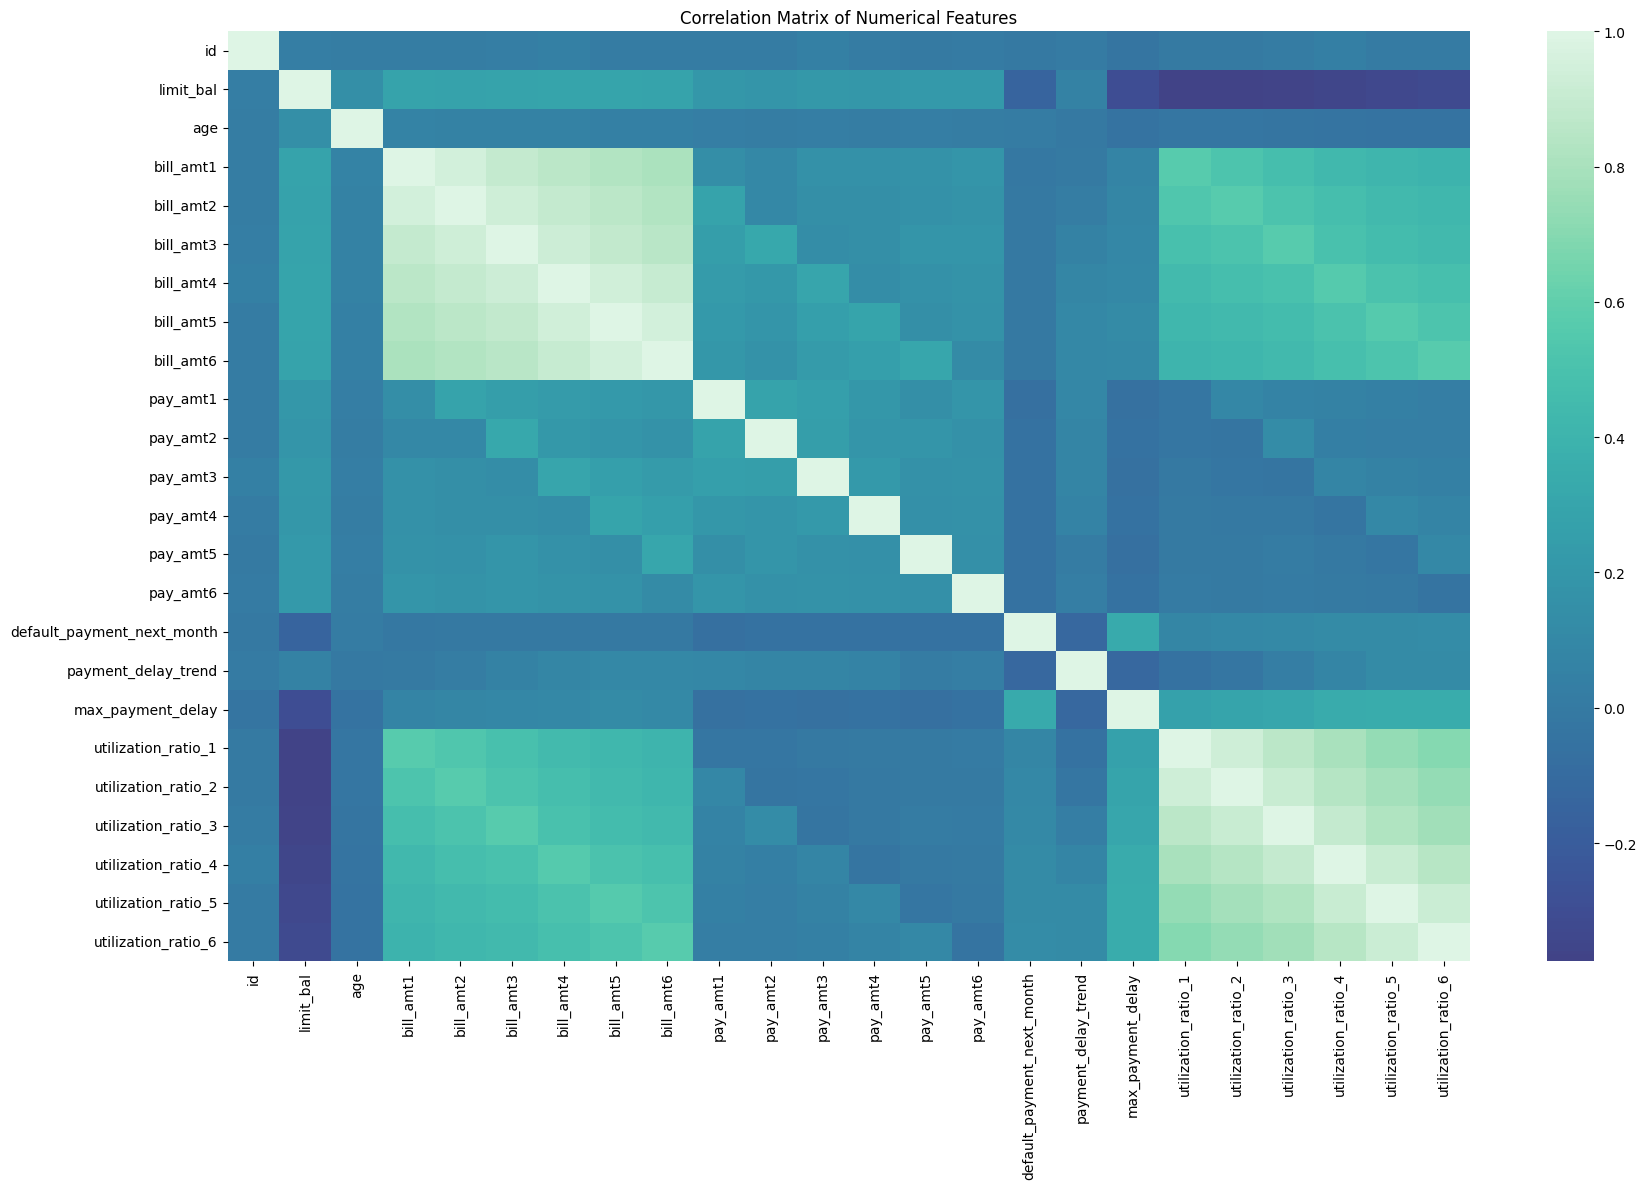


Top correlations of numerical features with default payment next month:
0.33 for max_payment_delay
0.15 for limit_bal
0.13 for payment_delay_trend
0.12 for utilization_ratio_6
0.12 for utilization_ratio_5


In [14]:
# Correlation analysis with numerical features
plt.figure(figsize=(18, 12))
num_corr_matrix = df[num_cols].corr()
sns.heatmap(num_corr_matrix, annot=False, cmap="mako", center=0)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

# Find top correlations with target
top_corr_vars = (
    num_corr_matrix["default_payment_next_month"]
    .abs()
    .sort_values(ascending=False)
    .index[1:6]  
)
top_corr_vals = (
    num_corr_matrix["default_payment_next_month"]
    .abs()
    .sort_values(ascending=False)
    .iloc[1:6]  
    .round(2)
)
print("\nTop correlations of numerical features with default payment next month:")
for var, val in zip(top_corr_vars, top_corr_vals):
    print(f"{val} for {var}")

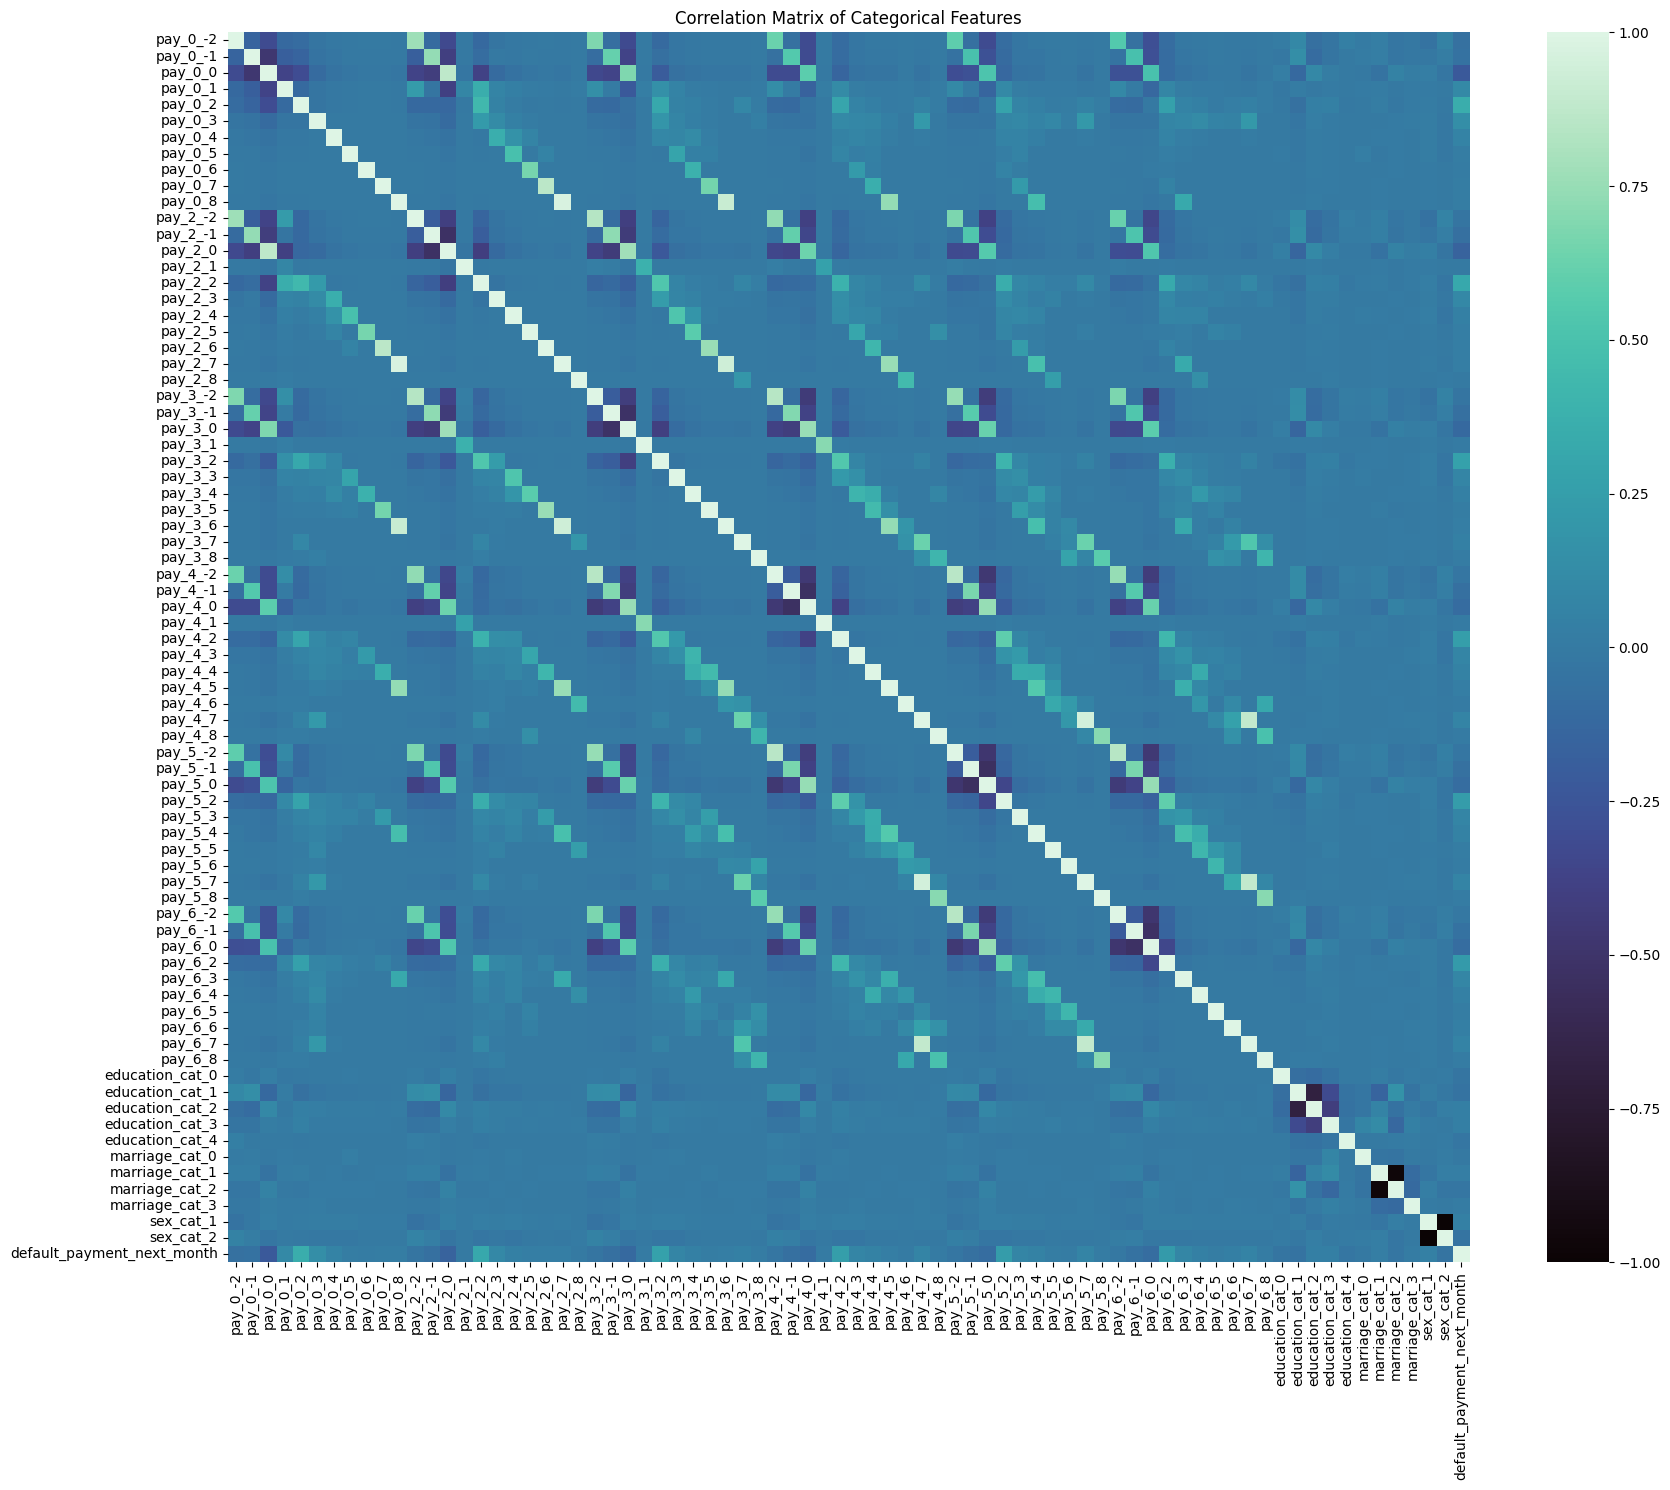


Top correlations of catgorical features with default payment next month:
0.35 for pay_0_2
0.31 for pay_2_2
0.27 for pay_3_2
0.25 for pay_4_2
0.24 for pay_5_2


In [15]:
# Correlation analysis with categorical features
plt.figure(figsize=(18, 15))

# Convert categorical columns to numeric for correlation analysis
cat_df = pd.get_dummies(df[cat_cols])
cat_df["default_payment_next_month"] = df["default_payment_next_month"]

# Calculate correlation matrix
cat_corr_matrix = cat_df.corr()

# Calculate correlation matrix
sns.heatmap(
    cat_corr_matrix,
    annot=False,
    cmap="mako",
    center=0,
    xticklabels=True,
    yticklabels=True
)

plt.title("Correlation Matrix of Categorical Features")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find top correlations with target
top_corr_vars = (
    cat_corr_matrix["default_payment_next_month"]
    .abs()
    .sort_values(ascending=False)
    .index[1:6]  
)
top_corr_vals = (
    cat_corr_matrix["default_payment_next_month"]
    .abs()
    .sort_values(ascending=False)
    .iloc[1:6]  
    .round(2)
)
print("\nTop correlations of catgorical features with default payment next month:")
for var, val in zip(top_corr_vars, top_corr_vals):
    print(f"{val} for {var}")